In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [26]:
us_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_US.csv')
other_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_ClimateWatch.csv')
land_usage_df = pd.read_csv('CE-Project-Data/Agricultural_Land_Usage.csv')
pd.set_option('display.max_columns', None)

food_security_ghana = pd.read_csv('CE-Project-Data/food_security_ghana.csv')
food_security_usa = pd.read_csv('CE-Project-Data/food_security_usa.csv')

Text(0.5, 1.0, 'Food Insecurity Index')

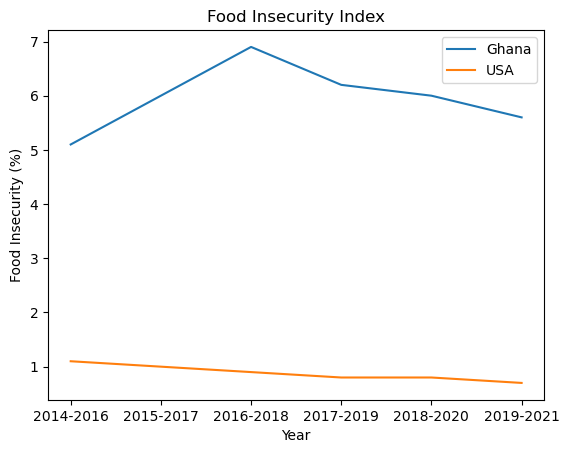

In [27]:
#Separate food insecurity data for usa and ghana for total population.

food_security_ghana_totalpop = food_security_ghana[food_security_ghana['Item Code']=='210401']                                            
food_security_usa_totalpop = food_security_usa[food_security_usa['Item Code']=='210401']


plt.plot(food_security_ghana_totalpop['Year'], food_security_ghana_totalpop['Value'], label="Ghana")
plt.plot(food_security_usa_totalpop['Year'], food_security_usa_totalpop['Value'], label="USA")
plt.legend(loc="best")
#plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Food Insecurity (%)")
plt.title("Food Insecurity Index")


In [29]:
#separate US data by state, sector, and gas type. sum the total gas emissions for each year
#US data frames to use: us_df_state, us_df_sector, us_df_gas, us_df_sum
us_ghg=us_df[us_df['Gas']=='All GHG']
us_df_state = us_ghg.groupby(['State']).sum()
us_df_state = us_df_state.style.format('{:.3f}')
us_df_sector = us_ghg.groupby(['Sector']).sum()
us_df_sector = us_df_sector.style.format('{:.3f}')
us_df_gas = us_ghg.groupby(['Gas']).sum()
us_df_sum = pd.DataFrame(us_df_gas.sum(axis=0)).T.rename(index={0:'US Total'}).style.format('{:.3f}')
us_df_gas = us_df_gas.style.format('{:.3f}')

#"all ghg" row needs to be filtered first for usa total
us_ghg=us_df[us_df['Gas']=='All GHG']

#filter agriculture sector for usa
us_ghg2=us_ghg[us_ghg['Sector'].str.contains('Agriculture')]

#total GHG emissions for Agriculture
us_ghg_total= us_ghg2[us_ghg2['State']=="USA"]

#Display all GHG by sector for USA
us_sectors= us_df[us_df['State']=='USA']
ghg_us_sectors= us_sectors[us_sectors['Gas']=='All GHG']

#Display all GHG by sector for Ghana
ghg_ghana_sectors= ghana_df[ghana_df['Gas']=='All GHG']
ghg_ghana_sectors

#create a stacked bar chart to display emissions by sector


,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3637,GHA,Climate Watch,Total excluding LUCF,All GHG,11.897850,11.977650,12.507420,12.726720,13.064580,13.412390,14.334500,15.262370,17.979520,17.374090,17.631250,16.921140,18.176900,18.676760,17.519840,19.762230,20.942800,21.176910,20.980610,22.167380,23.954670,25.950330,28.536840,30.602020,30.140480,31.605390,32.092000,34.203900,35.832270,37.651570
3638,GHA,Climate Watch,Total including LUCF,All GHG,21.971620,22.051420,22.581200,22.800500,23.138350,23.488360,24.376610,25.689030,29.275680,28.046340,28.396830,62.795970,64.051290,64.551550,63.396000,65.644040,66.852940,67.086510,66.852260,68.018870,69.808790,55.376530,57.967230,60.019310,59.548890,61.022370,7.243964,9.304669,10.938470,12.747490
3639,GHA,Climate Watch,Energy,All GHG,3.555000,3.326100,3.768600,3.842400,4.136500,4.441800,4.779600,4.933600,6.817900,7.235200,6.031200,6.445700,7.637300,7.290200,6.816000,7.167200,8.621500,9.220800,8.813300,10.176600,11.277400,12.079800,14.159700,15.338300,14.889100,15.964800,16.081900,17.620200,19.255200,20.789100
3640,GHA,Climate Watch,Industrial Processes,All GHG,0.860362,0.894998,1.076034,1.152871,1.084807,1.004543,1.113719,1.287595,0.934672,1.059448,1.054224,1.042975,1.052025,1.040843,1.029761,0.978979,1.016787,1.051594,1.091502,1.136909,1.298017,1.533548,2.425480,2.507612,2.588744,2.417876,2.587520,2.613163,2.794807,2.898451
3641,GHA,Climate Watch,Agriculture,All GHG,6.750394,6.979730,6.872989,6.909441,6.936529,6.981573,7.429977,7.563491,8.672055,7.492860,8.717721,7.539638,7.413805,8.082969,7.212575,9.046131,8.644847,8.166854,8.260156,7.960230,8.407620,9.282713,8.814759,9.536574,9.360477,9.837925,9.951817,10.413810,10.139560,10.235350
3642,GHA,Climate Watch,Waste,All GHG,0.732090,0.776820,0.789800,0.822010,0.906740,0.984470,1.011200,1.477680,1.554890,1.586580,1.828100,1.892830,2.073770,2.262750,2.461500,2.569920,2.659670,2.737661,2.815652,2.893643,2.971633,3.054265,3.136897,3.219529,3.302161,3.384793,3.470761,3.556729,3.642697,3.728665
3643,GHA,Climate Watch,Land-Use Change and Forestry,All GHG,10.073770,10.073770,10.073770,10.073770,10.073770,10.075970,10.042120,10.426670,11.296160,10.672250,10.765580,45.874830,45.874390,45.874790,45.876170,45.881810,45.910140,45.909600,45.871650,45.851480,45.854120,29.426200,29.430390,29.417290,29.408410,29.416980,-24.848000,-24.899200,-24.893800,-24.904100
3644,GHA,Climate Watch,Bunker Fuels,All GHG,0.141300,0.105900,0.138000,0.118700,0.138000,0.179800,0.192700,0.192700,0.279500,0.467400,0.489900,0.370500,0.418900,0.415600,0.421600,0.518600,0.512100,0.554000,0.576900,0.644800,0.671200,0.699700,0.706100,0.592600,0.405200,0.385900,0.424200,0.821300,0.668000,0.888200
3649,GHA,Climate Watch,Electricity/Heat,All GHG,0.044300,0.052600,0.052600,0.060900,0.080800,0.065900,0.055800,0.031800,1.217300,1.150100,0.543400,0.934600,1.953800,1.732900,0.613500,1.100900,2.409800,2.611800,1.892800,1.731400,3.082900,2.525200,3.103500,3.692800,3.316200,3.371000,4.266900,4.637000,5.292200,5.957200
3650,GHA,Climate Watch,Building,All GHG,1.398000,1.290000,1.357000,1.396600,1.474900,1.555900,1.642600,1.695100,1.789900,1.828900,1.151000,1.238800,1.092600,1.224300,1.212000,1.120900,1.060900,1.233100,1.033500,1.459600,1.217800,1.377900,1.446600,1.360400,1.324100,1.411900,1.419800,1.538800,1.543800,1.606300


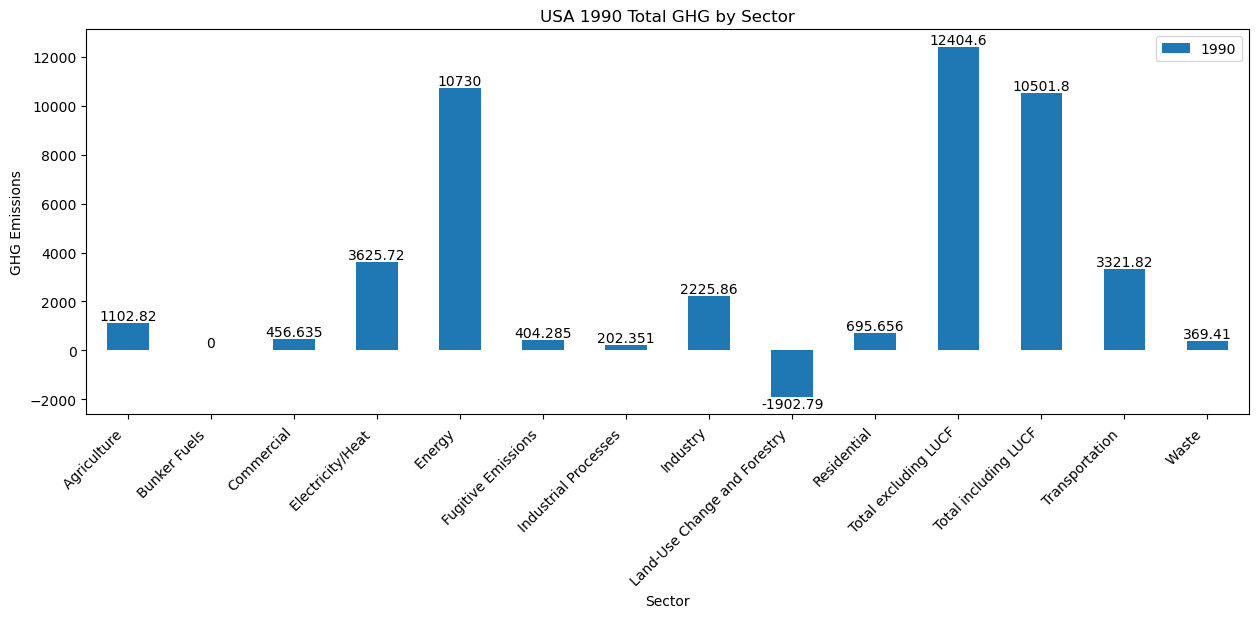

<Figure size 640x480 with 0 Axes>

In [163]:
#Graph USA 1990 GHG by Sector
usdf_sector = us_df_sector.data

# create a bar chart using only the first column
usdf_bar = usdf_sector["1990"].plot.bar(rot=0, figsize=(15, 5))
usdf_bar.set_xticklabels(usdf_sector.index, rotation=45, ha="right")

for x in usdf_bar.containers:
    usdf_bar.bar_label(x, label_type='edge', fontsize=10)

plt.xlabel('Sector')
plt.ylabel('GHG Emissions')
plt.title('USA 1990 Total GHG by Sector')
plt.legend(loc="best")


plt.show()
plt.tight_layout()

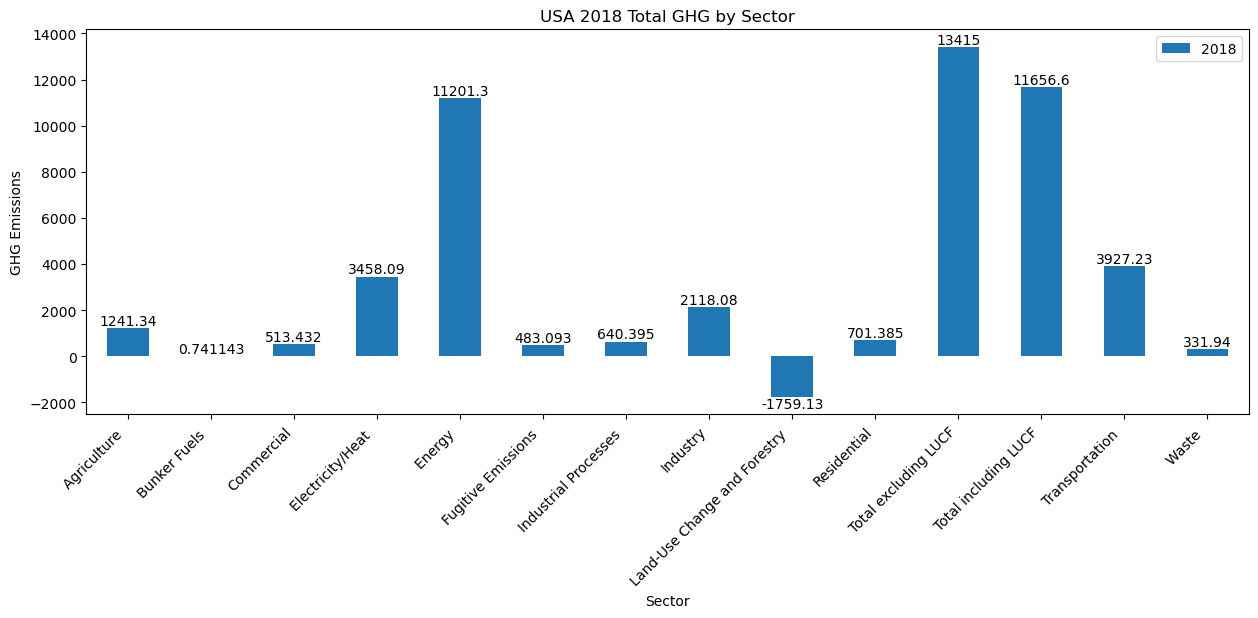

<Figure size 640x480 with 0 Axes>

In [164]:
#Graph USA 2018 GHG by Sector
# create a bar chart using only the first column
usdf_bar = usdf_sector["2018"].plot.bar(rot=0, figsize=(15, 5))
usdf_bar.set_xticklabels(usdf_sector.index, rotation=45, ha="right")

for x in usdf_bar.containers:
    usdf_bar.bar_label(x, label_type='edge', fontsize=10)

plt.xlabel('Sector')
plt.ylabel('GHG Emissions')
plt.title('USA 2018 Total GHG by Sector')
plt.legend(loc="best")


plt.show()
plt.tight_layout()

In [30]:
#insert drought data and compare 

In [28]:
ghana_df = other_df[other_df['Country']=='GHA']

In [38]:
#separate Ghana data by sector and gas type. Sum the total gas emissions for each year
#Ghana data frames to use: ghana_df_sector, ghana_df_gas, ghana_df_sum
ghana_ghg=ghana_df[ghana_df['Gas']=='All GHG']
ghana_df_sector = ghana_ghg.groupby(['Sector']).sum()
ghana_df_sector = ghana_df_sector.style.format('{:.3f}')
ghana_df_gas = ghana_ghg.groupby(['Gas']).sum()
ghana_df_sum = pd.DataFrame(ghana_df_gas.sum(axis=0)).T.rename(index={0:'Ghana Total'}).style.format('{:.3f}')
ghana_df_gas = ghana_df_gas.style.format('{:.3f}')

#Filter Ghanas agriculture sector and all ghg emissions
gh_ghg=ghana_df[ghana_df['Sector'].str.contains('Agriculture')]
gh_ghg_total=gh_ghg[gh_ghg['Gas']=='All GHG']
#gh_ghg_total

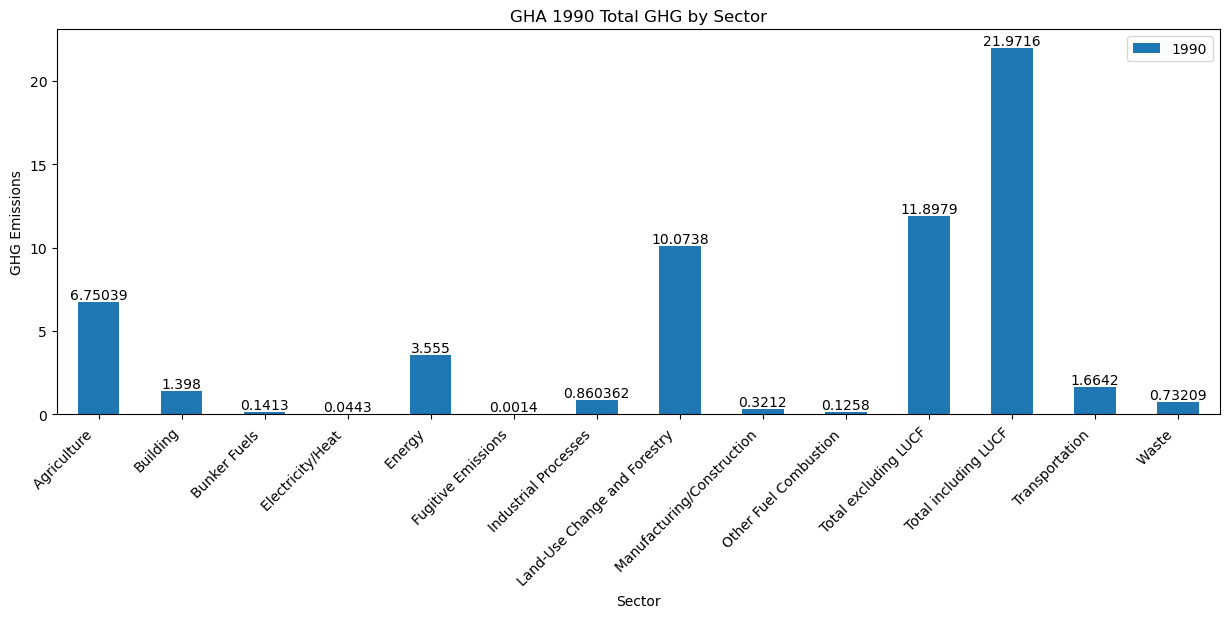

<Figure size 640x480 with 0 Axes>

In [167]:
#Graph GHA 1990 GHG by Sector
ghadf_sector = ghana_df_sector.data

# create a bar chart using only the first column
ghadf_bar = ghadf_sector["1990"].plot.bar(rot=0, figsize=(15, 5))
ghadf_bar.set_xticklabels(ghadf_sector.index, rotation=45, ha="right")

for x in ghadf_bar.containers:
    ghadf_bar.bar_label(x, label_type='edge', fontsize=10)

plt.xlabel('Sector')
plt.ylabel('GHG Emissions')
plt.title('GHA 1990 Total GHG by Sector')
plt.legend(loc="best")

plt.show()
plt.tight_layout()

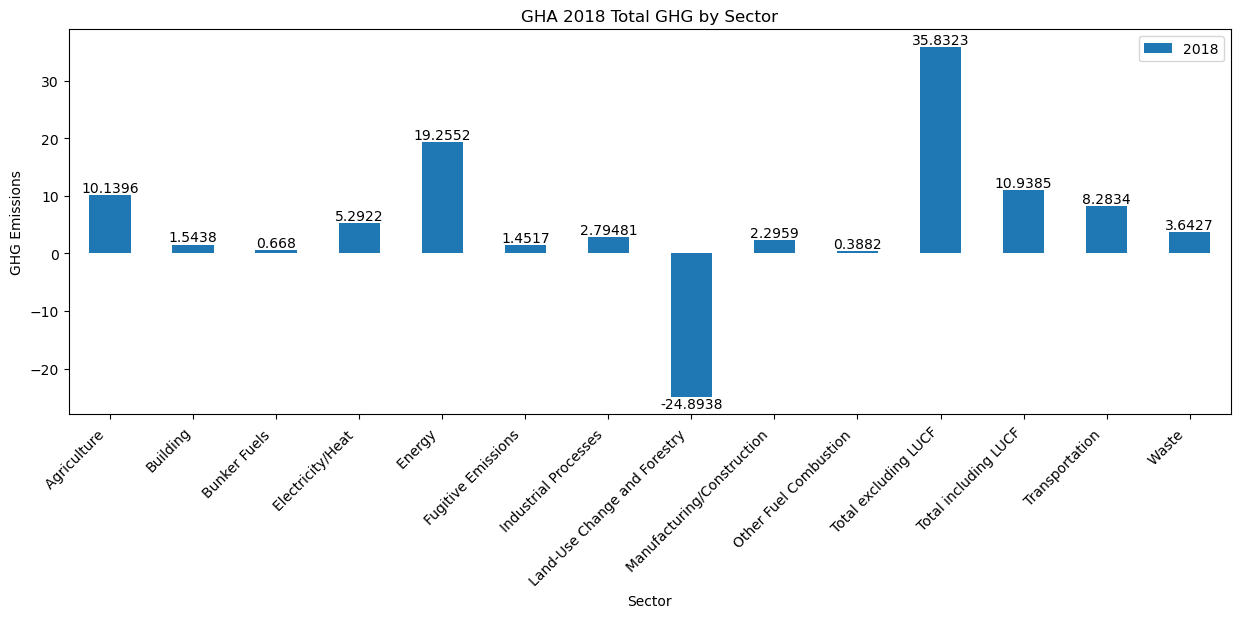

<Figure size 640x480 with 0 Axes>

In [168]:
#Graph GHA 1990 GHG by Sector
# create a bar chart using only the first column
ghadf_bar = ghadf_sector["2018"].plot.bar(rot=0, figsize=(15, 5))
ghadf_bar.set_xticklabels(ghadf_sector.index, rotation=45, ha="right")

for x in ghadf_bar.containers:
    ghadf_bar.bar_label(x, label_type='edge', fontsize=10)

plt.xlabel('Sector')
plt.ylabel('GHG Emissions')
plt.title('GHA 2018 Total GHG by Sector')
plt.legend(loc="best")

plt.show()
plt.tight_layout()

In [110]:
#calculate total change between 1990 & 2018 for US GHG
us_first = us_df_sum.iloc[0,1]
us_last = us_df_sum.iloc[0,-2]
us_ghg_change = (us_last-us_first)/us_first
us_ghg_percentchange = "{:.2%}".format(us_ghg_change)
us_ghg_percentchange

'6.67%'

In [123]:
#calculate total change over time for US Agriculture GHG
usa_sector = us_df_sector.data
usa_first = usa_sector.iloc[0,0]
usa_last = usa_sector.iloc[0,-2]
usa_ghg_change = (usa_last-usa_first)/usa_first
usa_ghg_percentchange = "{:.2%}".format(usa_ghg_change)
usa_ghg_percentchange

'10.30%'

In [109]:
#calculate total change betwee 1990 & 2018 for Ghana GHG
gh_first = ghana_df_sum.iloc[0,1]
gh_last = ghana_df_sum.iloc[0,-1]
ghana_ghg_change = (gh_last-gh_first)/gh_first
gh_ghg_percentchange = "{:.2%}".format(ghana_ghg_change)
gh_ghg_percentchange

'42.53%'

In [128]:
#calculate total change over time for Ghana Agriculture GHG
gha_sector = ghana_df_sector.data
gha_first = gha_sector.iloc[0,0]
gha_last = gha_sector.iloc[0,-1]
gha_ghg_change = (gha_last-gha_first)/gha_first
gha_ghg_percentchange = "{:.2%}".format(gha_ghg_change)
gha_ghg_percentchange

'51.63%'

Text(0.5, 1.0, 'Total Greenhouse Emissions from Agriculture')

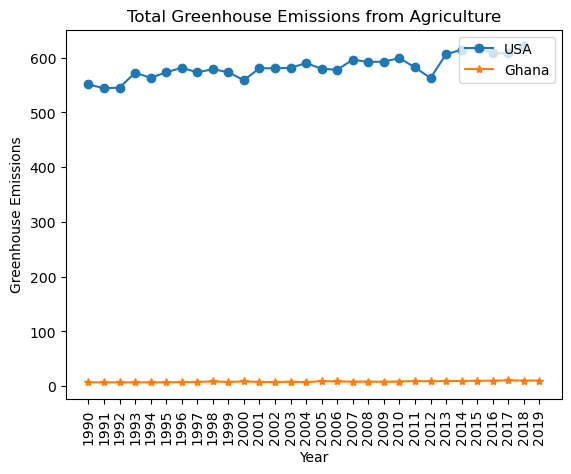

In [39]:
#compare ghanas and usa's total agriculture ghg emissions with a line graph 

usaghg= us_ghg_total.T
head_us=usaghg.iloc[1]
usaghg=usaghg[4:]
usaghg.columns=head_us

ghghg= gh_ghg_total.T
head_gh=ghghg.iloc[1]
ghghg=ghghg[4:]
ghghg.columns=head_gh


plt.plot(usaghg, label='USA', marker='o')
plt.plot(ghghg, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Greenhouse Emissions")
plt.title("Total Greenhouse Emissions from Agriculture")



In [33]:
#clean land usage data by getting rid of unnecessary columns
land_usage_df = land_usage_df.drop(land_usage_df.columns[3:34], axis=1)
land_usage_df = land_usage_df.drop(columns=['Country Code','2020','2021','Unnamed: 66'])
land_usage_df.head(2)

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Agricultural land (% of land area),11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,Africa Eastern and Southern,Agricultural land (% of land area),44.077433,44.175529,44.364624,43.405047,43.602308,43.786737,43.940969,44.096712,44.238249,44.453834,44.613694,44.754313,44.892132,45.218702,44.973395,45.150072,45.347753,45.511698,45.676483,45.943486,46.156943,46.361515,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846


In [34]:
#separate out Ghana and USA land usage data
#Land Usage DataFrames to use: land_usage_gha_df, land_usage_usa_df
land_usage_gha_df = land_usage_df[land_usage_df['Country Name']=='Ghana']
land_usage_usa_df = land_usage_df[land_usage_df['Country Name']=='United States']
land_usage_gha_df

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83,Ghana,Agricultural land (% of land area),55.396853,55.902259,55.902259,56.253845,56.693329,57.572295,58.451261,59.892766,58.392634,58.190318,57.548519,57.447297,57.297732,56.783396,56.000976,56.383185,55.886429,55.829155,55.332399,55.714608,56.008922,55.608544,55.735545,55.774651,55.813756,55.852861,55.653336,55.45381,55.406258,55.391316


Text(0.5, 1.0, '% of Land Area used for Agriculture')

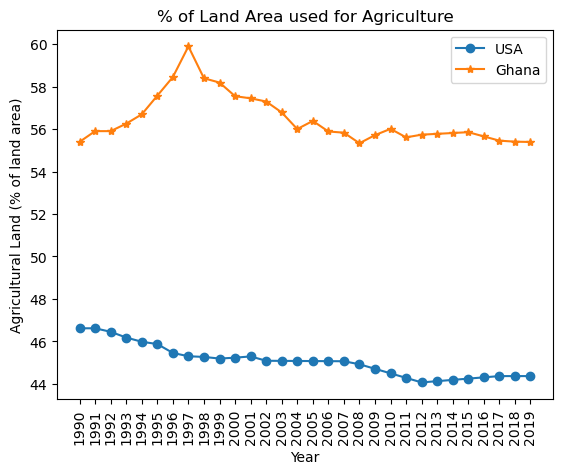

In [35]:
#create a line graph visualizing land use 

usaland_transposed= land_usage_usa_df.T
head=usaland_transposed.iloc[1]
usaland_transposed=usaland_transposed[2:]
usaland_transposed.columns=head

usaland_transposed

ghland_transposed=land_usage_gha_df.T
head2=ghland_transposed.iloc[1]
ghland_transposed=ghland_transposed[2:]
ghland_transposed.columns=head

plt.plot(usaland_transposed, label='USA', marker='o')
plt.plot(ghland_transposed, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Agricultural Land (% of land area)")
plt.title("% of Land Area used for Agriculture")

